In [3]:
from PIL import Image
import torch
from torchvision import transforms

In [9]:
img = Image.open("./Bobby.jpg")
transform_to_tensor = transforms.ToTensor()
transform_to_pil = transforms.ToPILImage()
img_t = transform_to_tensor(img)
img_t

tensor([[[0.2627, 0.2745, 0.2745,  ..., 0.3176, 0.3176, 0.3137],
         [0.2471, 0.2627, 0.2745,  ..., 0.3137, 0.3137, 0.3137],
         [0.2275, 0.2392, 0.2549,  ..., 0.3098, 0.3098, 0.3098],
         ...,
         [0.3882, 0.3882, 0.3882,  ..., 0.3137, 0.3137, 0.3176],
         [0.3922, 0.3922, 0.3843,  ..., 0.3216, 0.3216, 0.3216],
         [0.3882, 0.3843, 0.3765,  ..., 0.3333, 0.3333, 0.3333]],

        [[0.2392, 0.2392, 0.2353,  ..., 0.2863, 0.2863, 0.2824],
         [0.2235, 0.2275, 0.2353,  ..., 0.2824, 0.2824, 0.2784],
         [0.2118, 0.2235, 0.2314,  ..., 0.2824, 0.2824, 0.2784],
         ...,
         [0.3725, 0.3725, 0.3725,  ..., 0.2784, 0.2784, 0.2824],
         [0.3725, 0.3725, 0.3765,  ..., 0.2784, 0.2784, 0.2784],
         [0.3686, 0.3647, 0.3647,  ..., 0.2863, 0.2863, 0.2863]],

        [[0.2392, 0.2431, 0.2392,  ..., 0.3373, 0.3373, 0.3412],
         [0.2235, 0.2314, 0.2392,  ..., 0.3412, 0.3412, 0.3451],
         [0.2078, 0.2196, 0.2314,  ..., 0.3529, 0.3529, 0.

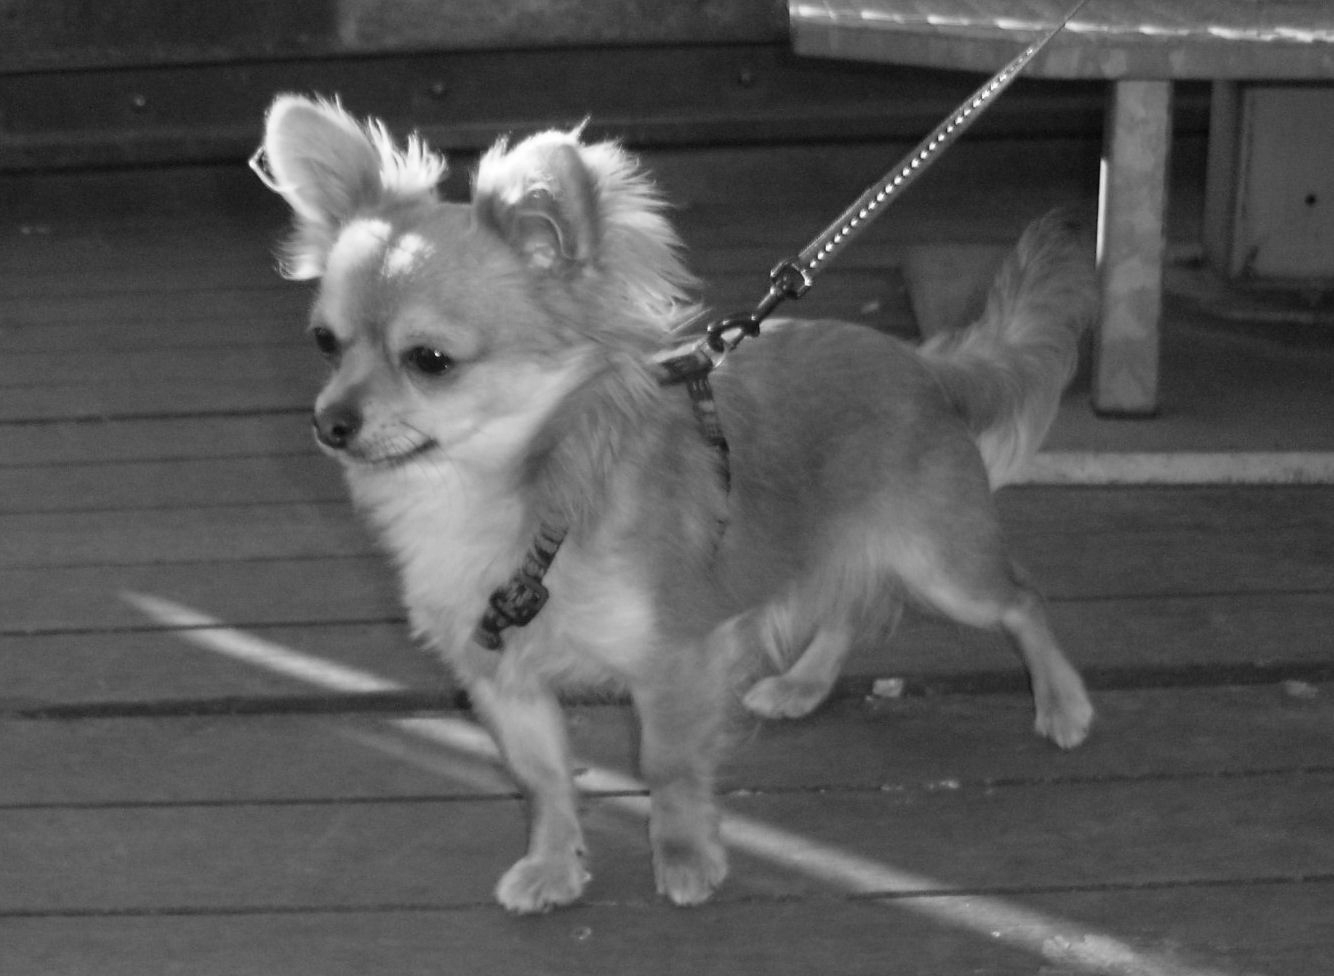

In [11]:
img_naive_mean = img_t.mean(-3)
transform_to_pil(img_naive_mean)

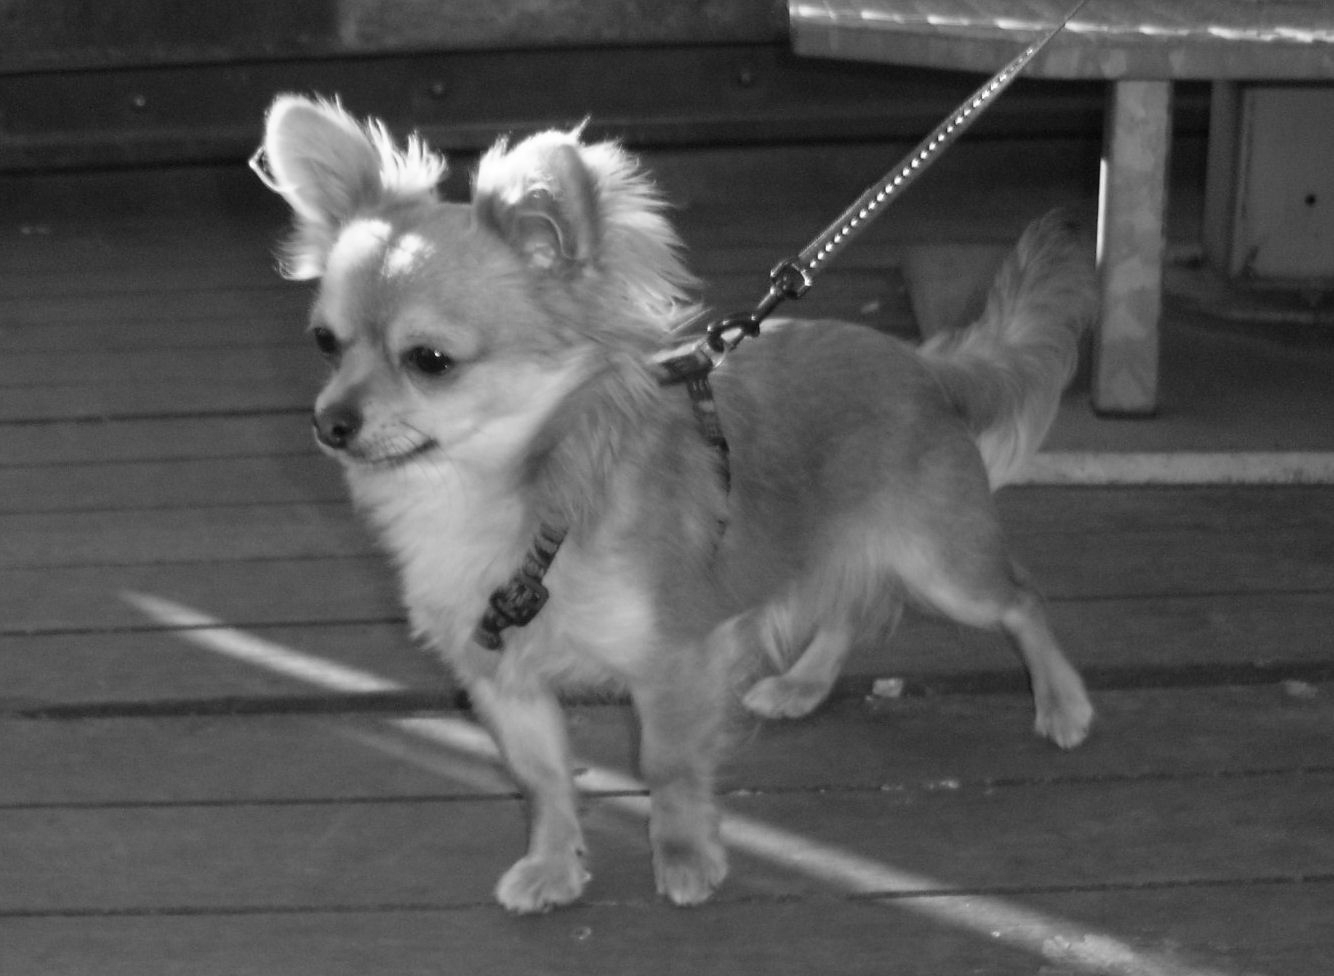

In [45]:
weights = torch.tensor([0.2126, 0.6152, 0.1722])
img_greyscaled = (img_t * weights.view(3,1,1)).sum(-3)
img_greyscaled.sum(0).shape
transform_to_pil(img_greyscaled)

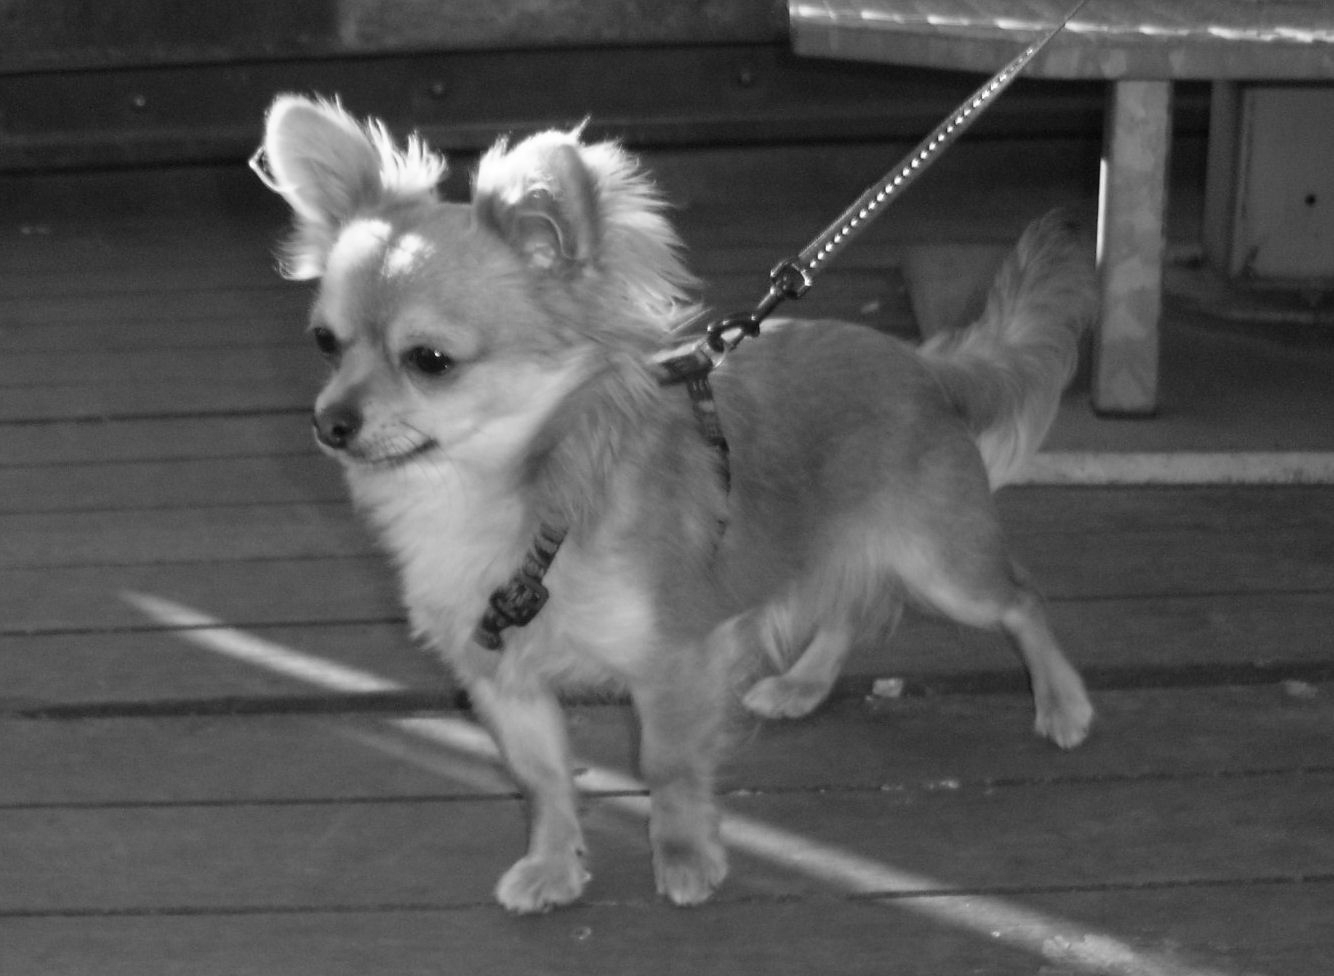

In [51]:
img_gray_weighted_fancy = torch.einsum('chw,c->hw', img_t, weights)
transform_to_pil(img_gray_weighted_fancy)